# Voter intent over time

In [2]:
library(ggplot2)
library(scales)
library(dplyr)

theme_set(theme_bw())

load('../data/voter_intent.Rdata')

head(voter_intent)

date,p_obama
2012-09-22,0.4649
2012-09-23,0.4883
2012-09-24,0.4744
2012-09-25,0.5069
2012-09-26,0.4729
2012-09-27,0.5108


## Voter intent over time (2012 presidential election)

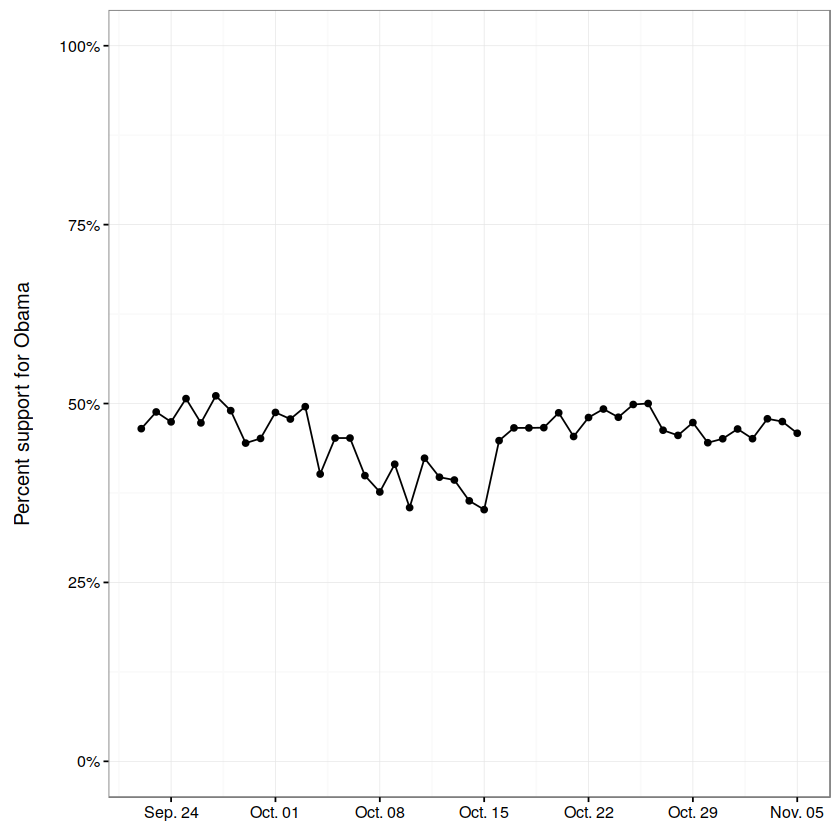

In [3]:
p <- ggplot(data=voter_intent, aes(x=date, y=p_obama)) +
  geom_point() +
  geom_line() +
  scale_x_date(element_blank(), date_breaks='1 week', date_labels='%b. %d') +
  scale_y_continuous('Percent support for Obama\n', labels=percent,
                     limits=c(0, 1))
p

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


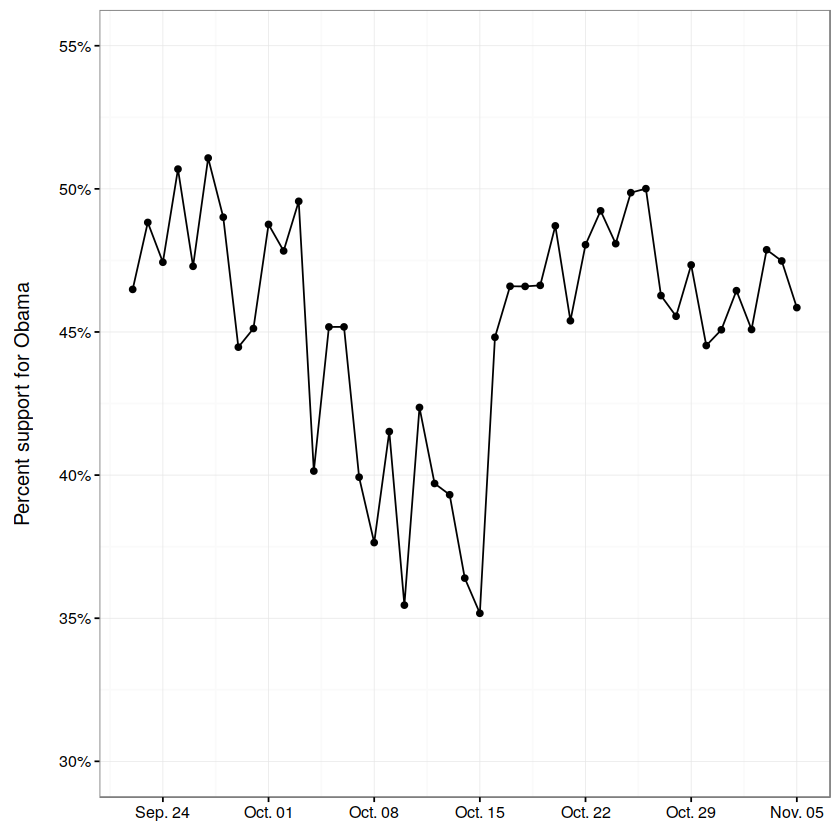

In [4]:
p <-  p +
  scale_y_continuous('Percent support for Obama\n', labels=percent,
                     limits=c(.3, .55))
p

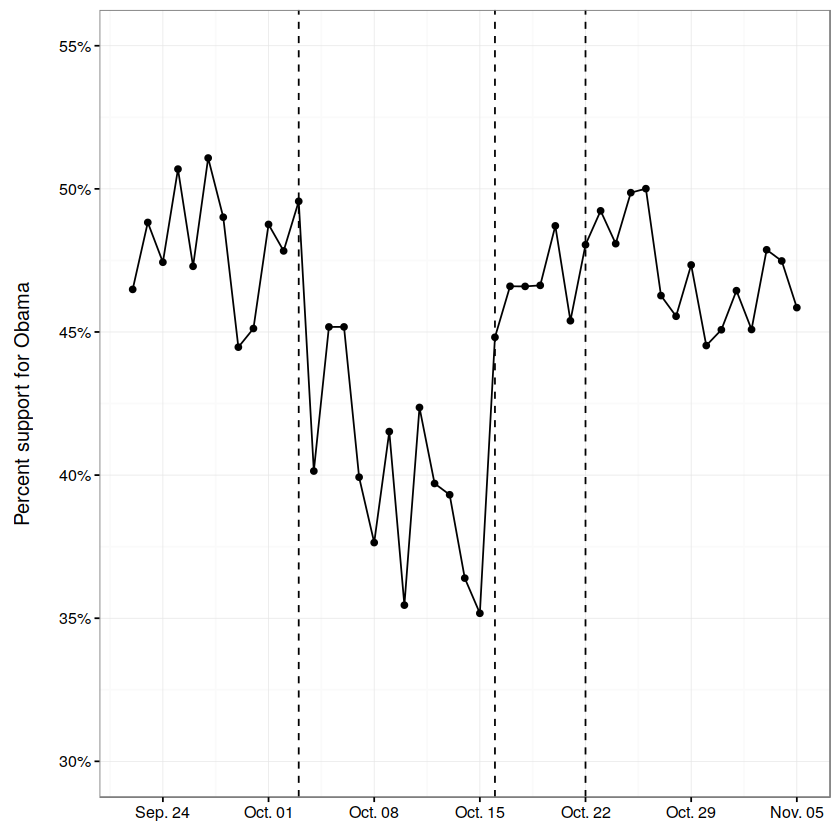

In [5]:
p <-  p +
  geom_vline(data=debates, aes(xintercept=as.numeric(dates)), linetype='dashed')
p

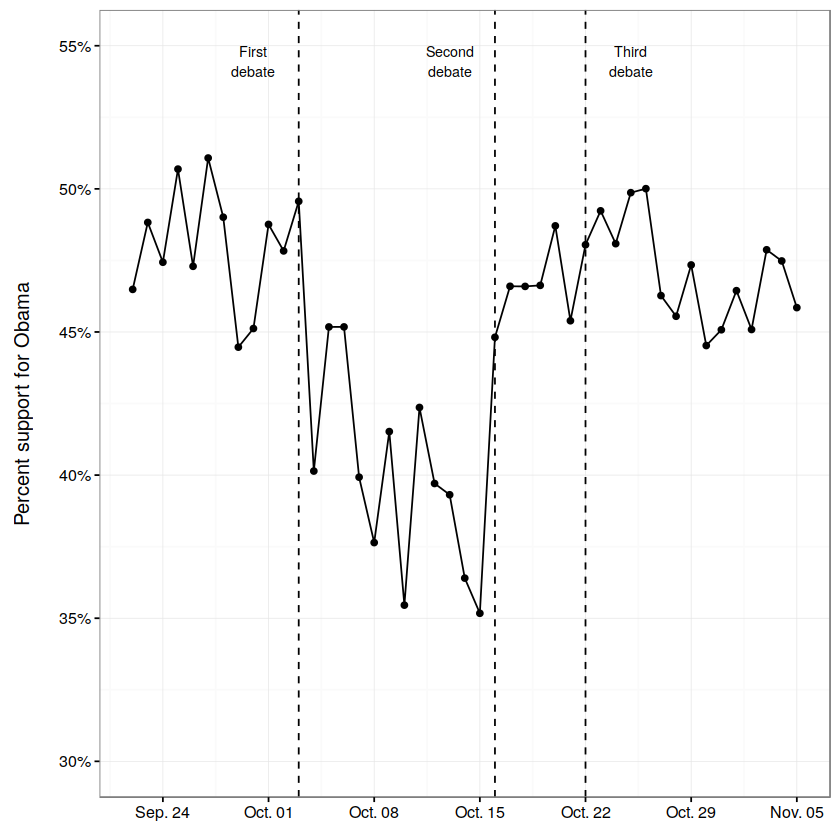

In [6]:
debates$event <- paste(c('First', 'Second', 'Third'), 'debate', sep='\n')
p <-  p +
  geom_text(data=debates, aes(x=dates, y=.55, label=event),
            vjust=1, nudge_x=c(-3, -3, 3), size=3)
p

## Demographic distribution

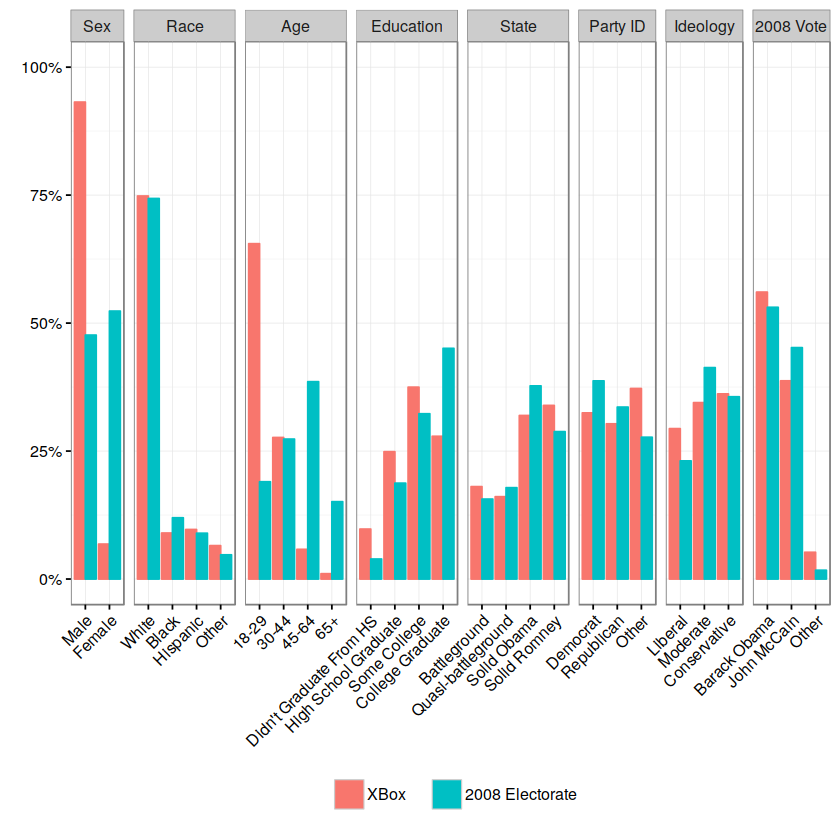

In [7]:
capitalize_all <- Vectorize(function(x) {
  s <- strsplit(x, " ")[[1]]
  paste(toupper(substring(s, 1,1)), substring(s, 2), sep="", collapse=" ")
})

p <- ggplot(demographic_dist, aes(x=attribute, y=p, group=source)) +
  geom_bar(aes(color=source, fill=source), stat='identity', position='dodge') +
  facet_grid(.~cat, scales="free_x", space="free") +
  scale_y_continuous(element_blank(), limits=c(0,1), labels=percent_format()) +
  scale_x_discrete(element_blank(), labels=capitalize_all) +
  theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
  theme(legend.position='bottom', legend.title=element_blank())

p

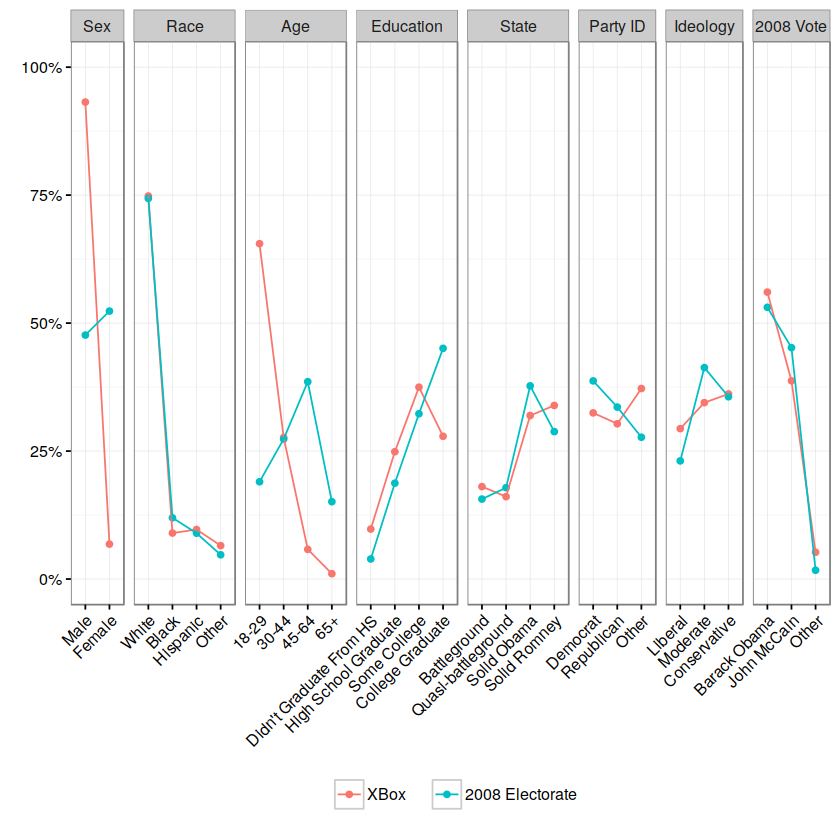

In [8]:
p <- ggplot(demographic_dist, aes(attribute, p, group=source)) +
  geom_point(aes(color=source)) +
  geom_line(aes(color=source)) +
  facet_grid(.~cat, scales="free_x", space="free") +
  scale_y_continuous(element_blank(), limits=c(0,1), labels=percent_format()) +
  scale_x_discrete(element_blank(), labels=capitalize_all) +
  theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
  theme(legend.position='bottom', legend.title=element_blank())

p

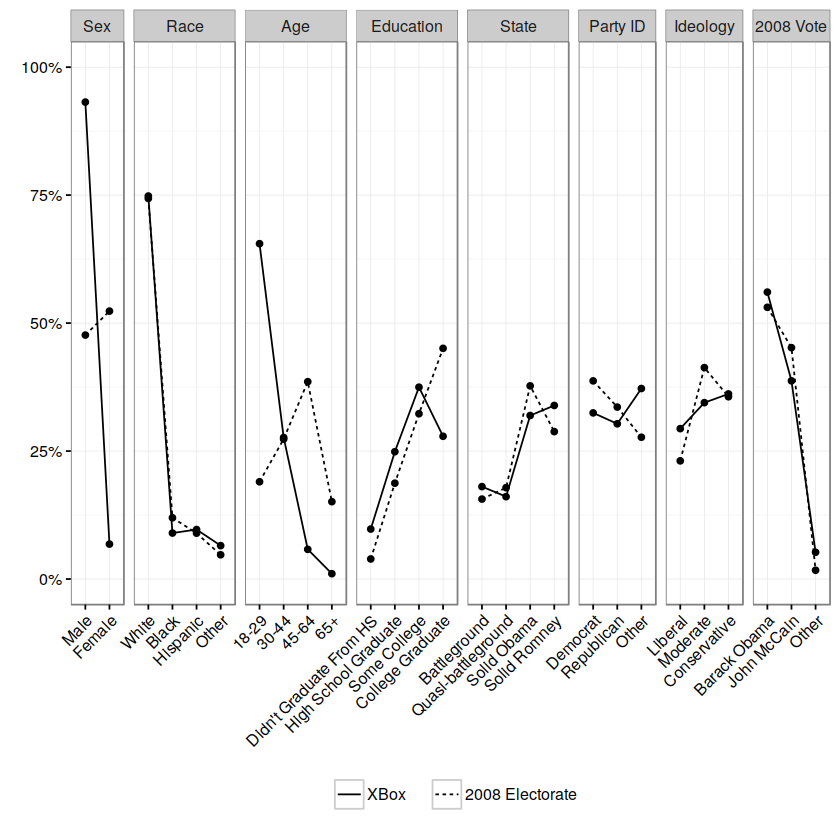

In [9]:
p <- ggplot(demographic_dist, aes(attribute, p, group=source)) +
  geom_point() +
  geom_line(aes(linetype=source)) +
  facet_grid(.~cat, scales="free_x", space="free") +
  scale_y_continuous(element_blank(), limits=c(0,1), labels=percent_format()) +
  scale_x_discrete(element_blank(), labels=capitalize_all) +
  theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
  theme(legend.position='bottom', legend.title=element_blank())

p